#SMA Percent Band

    1. The SPY is closes above its upper band or 200ma, buy
    2. If the SPY closes below its lower band and 200ma, sell your long position.

In [85]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [86]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [87]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [88]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 100000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [89]:
sma_period = 200
percent_band = 1.0

Run Strategy

In [90]:
s = strategy.Strategy(symbol, capital, start, end, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [91]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [92]:
s.tlog.tail(100)

,entry_date,entry_price,long_short,qty,exit_date,exit_price,pl_points,pl_cash,cumul_total
0,2005-09-02,44.25,long,2259.00,2006-10-20 00:00:00,58.78,14.53,32823.27,32823.27
1,2006-11-01,61.36,long,2164.00,2008-09-02 00:00:00,79.20,17.84,38605.76,71429.03
2,2008-09-22,89.18,long,1922.00,2008-09-24 00:00:00,86.71,-2.47,-4747.34,66681.69
3,2008-09-29,89.57,long,1860.00,2008-09-30 00:00:00,85.07,-4.50,-8370.00,58311.69
4,2008-10-08,89.42,long,1770.00,2008-10-10 00:00:00,83.22,-6.20,-10974.00,47337.69
5,2008-12-26,85.60,long,1721.00,2009-01-07 00:00:00,82.75,-2.85,-4904.85,42432.84
6,2009-01-23,88.53,long,1608.00,2012-04-17 00:00:00,160.25,71.72,115325.76,157758.60
7,2012-08-23,161.89,long,1592.00,2013-02-22 00:00:00,152.97,-8.92,-14200.64,143557.96
8,2014-02-20,127.60,long,1908.00,2014-05-28 00:00:00,121.20,-6.40,-12211.20,131346.76
9,2014-06-19,126.94,long,1822.00,2014-09-19 00:00:00,117.09,-9.85,-17946.70,113400.06


In [93]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2015-05-22,206644.98,206644.98,206644.98,0.00,206644.98,1
2015-05-26,206644.98,206644.98,206644.98,0.00,206644.98,1
2015-05-27,206644.98,206644.98,206644.98,0.00,206644.98,1
2015-05-28,206644.98,206644.98,206644.98,0.00,206644.98,1
2015-05-29,206644.98,206644.98,206644.98,0.00,206644.98,1


Generate strategy stats - display all available stats

In [94]:
pf.print_full(s.stats)

start                                                  2005-09-02
end                                                    2015-05-29
beginning_balance                                          100000
ending_balance                                          206644.98
total_net_profit                                        106644.98
gross_profit                                            186754.79
gross_loss                                              -80109.81
profit_factor                                                2.33
return_on_initial_capital                                  106.64
annual_return_rate                                           7.74
trading_period                           9 years 8 months 27 days
pct_time_in_market                                          75.51
total_num_trades                                               11
num_winning_trades                                              3
num_losing_trades                                               8
num_even_t

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [95]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2005-09-02 00:00:00 BUY  2259 GLD @ 44.25
2015-05-29 00:00:00 SELL 2259.0 GLD @ 114.10


Plot Equity Curves: Strategy vs Benchmark

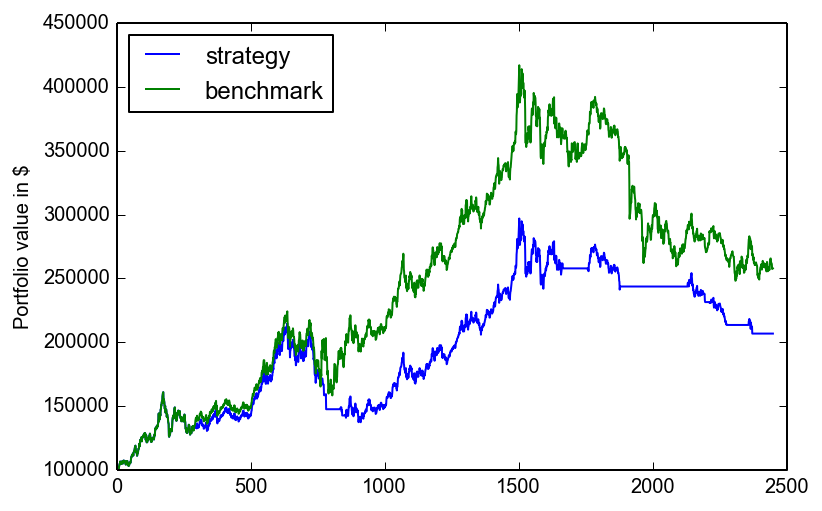

In [96]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

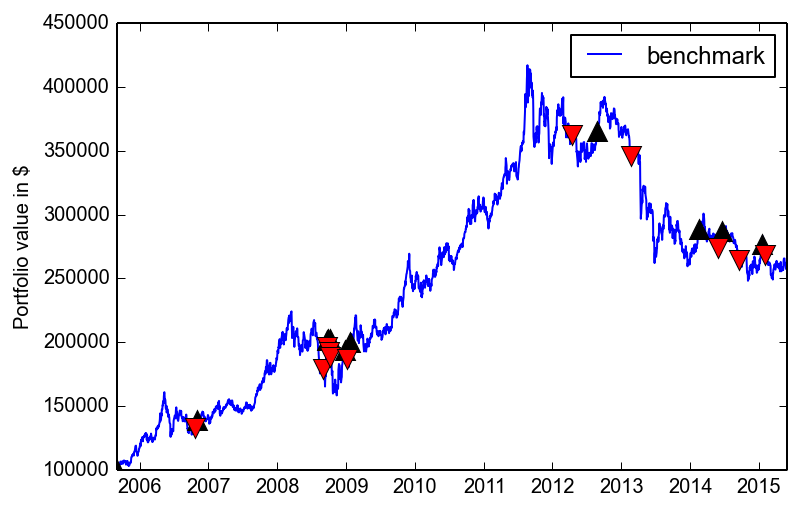

In [97]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.74,10.22
max_closed_out_drawdown,-36.12,-40.52
drawdown_annualized_return,-4.67,-3.97
drawdown_recovery,-1.08,-3.21
best_month,19.52,23.01
worst_month,-18.93,-19.66
sharpe_ratio,0.53,0.57
sortino_ratio,0.60,0.77
monthly_std,4.76,5.57


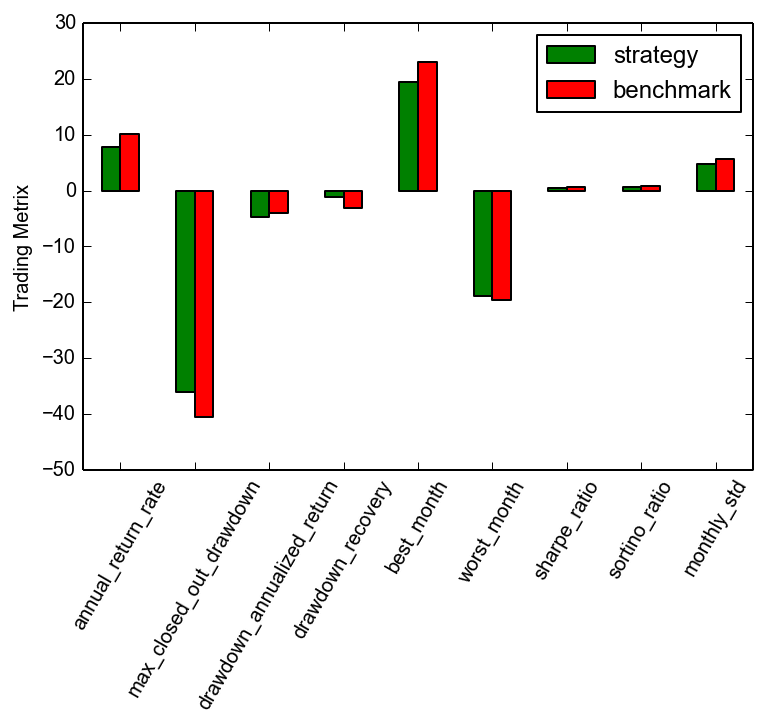

In [98]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df